In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## vector space
A **vector space** (also called a **linear space**) is a collection of objects called **vectors** which may be added together and multiplied by numbers (called **scalars** in this context). The operations of multiplication and addition must satisfy certain requirements called *axioms*.

A vector space over a field $F$ is a set $V$ together with two operations that satisfy the eight axioms below. Elements of $V$ are commonly called vectors. Elements of $F$ are commonly called scalars.

The first operation, called *vector addition* or just *addition* takes any two vectors $\vec{v}$ and $\vec{w}$ and assigns them to a third vector commonly written as $\vec{v} + \vec{w}$ and called the sum of these two vectors. The second operation, *vector multiplication* takes any scalar $a$ and any vector $\vec{v}$ and produces a new vector $a\vec{v}$.

### axioms
In the list below, let $\vec{u}$, $\vec{v}$ and $\vec{w}$ be arbitrary vectors in $V$, and $a$ and $b$ scalars in $F$.

#### associativity of addition
$\vec{u} + (\vec{v} + \vec{w}) = (\vec{u} + \vec{v}) + \vec{w}$

#### communativity of addition
$\vec{u} + \vec{w} = \vec{w} + \vec{u}$

#### identity element of addition
There exists an element $0 \in V$, called the *zero vector* such that $\vec{v} + 0 = \vec{v}$ for all $\vec{v} \in V$.

#### inverse elements of addition
For every element $\vec{v} \in V$ there exists an element $-\vec{v} \in V$ called the *additive inverse* of $\vec{v}$ such that $\vec{v} + (-\vec{v}) = 0$.

#### compatibility of scalar multiplication with field multiplication
$a(b\vec{v}) = (ab)\vec{v}$

#### identity element of scalar multiplication
 $1\vec{v} = \vec{v}$, where $1$ denotes the multiplicative identity in $F$.
 
#### distributivity of scalar multiplication with respect to vector addition
$a(\vec{u} + \vec{v}) = a\vec{u} + a\vec{v}$

#### distributivity of scalar multiplication with respect to field addition
$(a + b)\vec{v} = a\vec{v} + b\vec{v}$

When the scalar field $F$ is the real numbers $\mathbb{R}$, the vector space is called a *real vector space*. When the scalar field is complex numbers, the vector space is called a *complex vector space*.


## affine space
In an **affine space**, there is no distinguished point that serves as an origin. Hence, no vector has a fixed origin and no vector can be uniquely associated to a *point*. In an affine space, there are instead *displacement vectors* also called *translation vectors* or *simply translations*, between two points of the space. 

Thus it makes sense to subtract two points of the space, giving a translation vector, but it does not make sense to add two points of the space. 

$\vec{v} = P_2 - P_1$

Likewise, it makes sense to add a vector to a point of an affine space, resulting in a new point translated from the starting point by that vector.

$P_2 = P_1 + \vec{v}$

Note that we can interpolate any point $P_t$ on the line through points $P_1$ and $P_2$ by scaling the translation vector with a factor ${t}$.

$P_t = P_1 + t\vec{v} = P_1 + t(P_2 - P_1)$

This is demonstrated in the plot below.

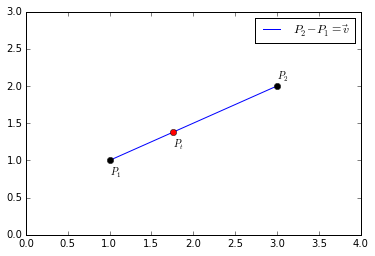

In [33]:
P1 = np.array([1, 1])
P2 = np.array([3, 2])
t = 0.38
Pt = P1 + t * (P2 - P1)

plt.plot((P1[0], P2[0]), (P1[1], P2[1]), label=r'$P_2 - P_1 = \vec{v}$')
plt.plot(*P1, 'ko')
plt.plot(*P2, 'ko')
plt.plot(*Pt, 'ro')

ax = plt.axes()
ax.set_xlim(0, 4)
ax.set_ylim(0, 3)
ax.annotate('$P_1$', (P1[0], P1[1]), xytext=(P1[0], P1[1] - 0.20))
ax.annotate('$P_2$', (P2[0], P2[1]), xytext=(P2[0], P2[1] + 0.10))
ax.annotate('$P_t$', (Pt[0], Pt[1]), xytext=(Pt[0], Pt[1] - 0.20))
plt.legend()

## affine combination
An **affine combination**, also sometimes called an *affine sequence*, of vectors ${x_1}, \ldots, {x_n}$ is a vector $\underset{i=1}{\overset{n}{\sum}}{\alpha_i}\cdot{x_i} = {\alpha_1}{x_1} + {\alpha_2}{x_2} + \cdots + {\alpha_n}{x_n}$ called a *linear combination* of ${x_1}, \ldots, {x_n}$ in which the sum of the coefficients is 1, thus: $\underset{i=1}{\overset{n}{\sum}}{\alpha_i} = 1$. 

Here the vectors ${x_i}$ are elements of a given vector space $V$ over a field $K$ and the coefficients ${\alpha_i}$ are scalars in $K$. This concept is important, for example, in *Euclidean geometry*.

The act of taking an affine combination commutes with any *affine transformation* $T$ in the sense that $T{\underset{i=1}{\overset{n}{\sum}}}{\alpha_i}\cdot{x_i} = \underset{i=1}{\overset{n}{\sum}}{\alpha_i}\cdot{T}{x_i}$.

In particular, any affine combination of the [fixed points](https://en.wikipedia.org/wiki/Fixed_point_(mathematics) of a given affine transformation $T$ is also a fixed point of $T$, so the set of fixed points of $T$ forms an affine subspace (in 3D: a line or a plane, and the trivial cases, a point or the whole space).